# **Attrition-Forecast-Analysis-and-Prediction**

This project aims to provide insights into the factors influencing employee attrition and predict which employees are likely to leave the company.

In [273]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

**Load Data**

In [274]:
Data=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

**view some data from the dataset**

In [275]:
#view frist row from the dataset
Data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [276]:
#view last row from the dataset
Data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [277]:
#view  data from the dataset
Data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**Data inspection**

In [278]:
#view  how many row & col from the dataset
Data.shape

(1470, 35)

In [279]:
#to know the null data on the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Exploratory Data Analysis



> **Statics**



In [280]:
#view  numeric features from the dataset
Data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [281]:
Data.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054




> **Missing values**



In [282]:
Data.isnull().sum()/Data.shape[0]*100

,0
Age,0.0
Attrition,0.0
BusinessTravel,0.0
DailyRate,0.0
Department,0.0
DistanceFromHome,0.0
Education,0.0
EducationField,0.0
EmployeeCount,0.0
EmployeeNumber,0.0


There are no missing values in the dataset.

In [283]:
Data.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [284]:
#to know if data  have unique var on the dataset
for i in Data.columns:
    if Data[i].dtypes=='object':
        print(i,Data[i].unique())
        print(Data[i].value_counts())
        print('----------------------------------------------------')

Attrition ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
----------------------------------------------------
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
----------------------------------------------------
Department ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
----------------------------------------------------
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
----------------------------------------------------
Gender ['Female' 'Male']
Gender
Male      8



>**Duplicated**



In [285]:
Data.duplicated().sum()

0



> **Drop unnecessary**



Features EmployeeCount, StandardHours and Over18 all have only one value And EmployeeNumber ,StockOptionLevel is not important. So, Drop them

In [286]:
Data=Data.drop(['Over18','EmployeeCount','StockOptionLevel','EmployeeNumber','StandardHours'],axis=1)
Data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


In [287]:
#The number of employees that stayed or left
Data['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237




> **Visualize distributions and relationships**







> Age Distribution with Gender



Text(0.5, 1.0, 'Age Distribution with Gender')

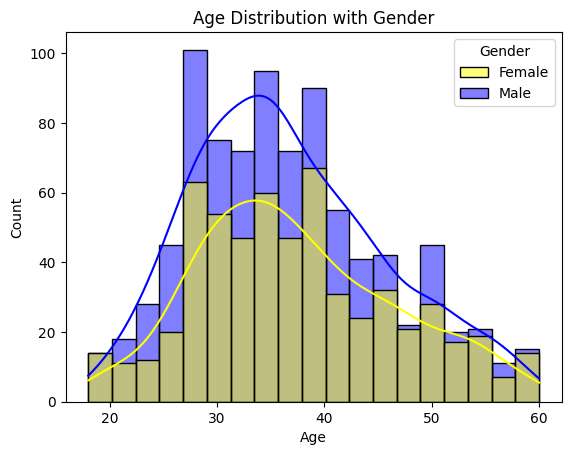

In [288]:
sns.histplot(data=Data, x="Age", kde=True,hue='Gender',palette={'Male': 'blue', 'Female': 'yellow'})
plt.title('Age Distribution with Gender')



> Attrition Distribution



In [289]:
Attrition = Data['Attrition'].unique()
explode = [0.1] + [0] * (len(Attrition) - 1)
colors=['#37E2D5','#FF4949']

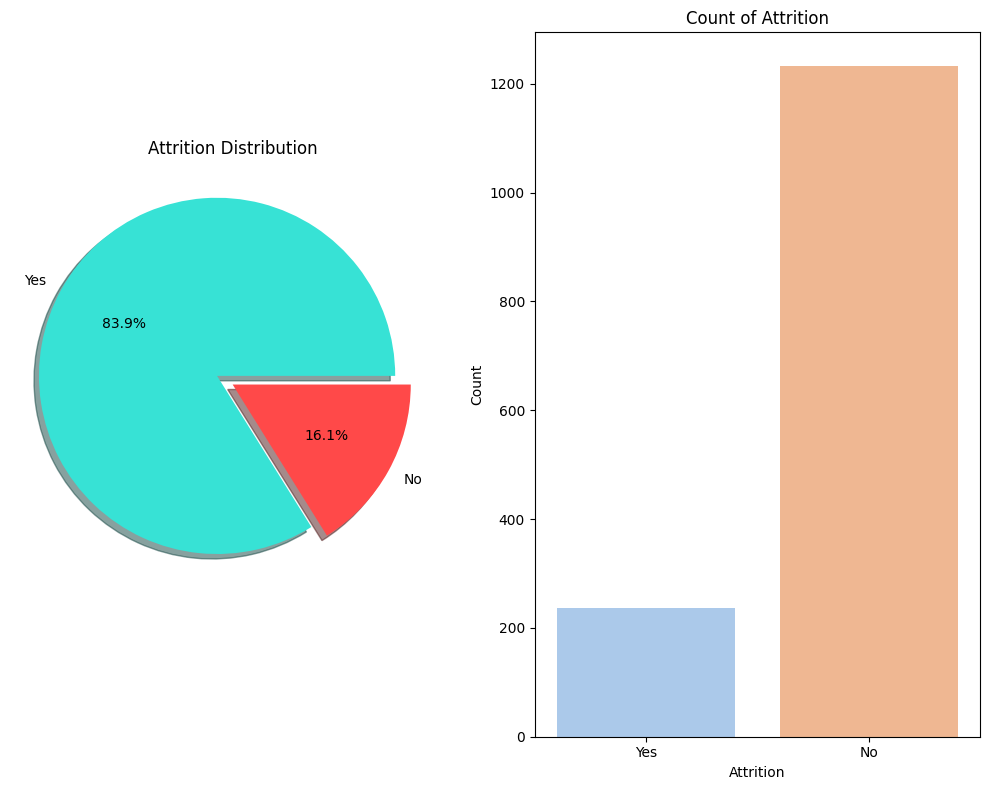

In [290]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
plt.sca(ax[0])
plt.pie(Data['Attrition'].value_counts(),
        labels=Attrition, shadow=True,
        explode=explode, colors=colors,
        autopct='%1.1f%%')
plt.title('Attrition Distribution')

plt.sca(ax[1])
countplot = sns.countplot(x='Attrition', data=Data, palette='pastel')
ax[1].set_title('Count of Attrition')
ax[1].set_xlabel('Attrition')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()



> Distribution of TotalWorkingYears & YearsAtCompany



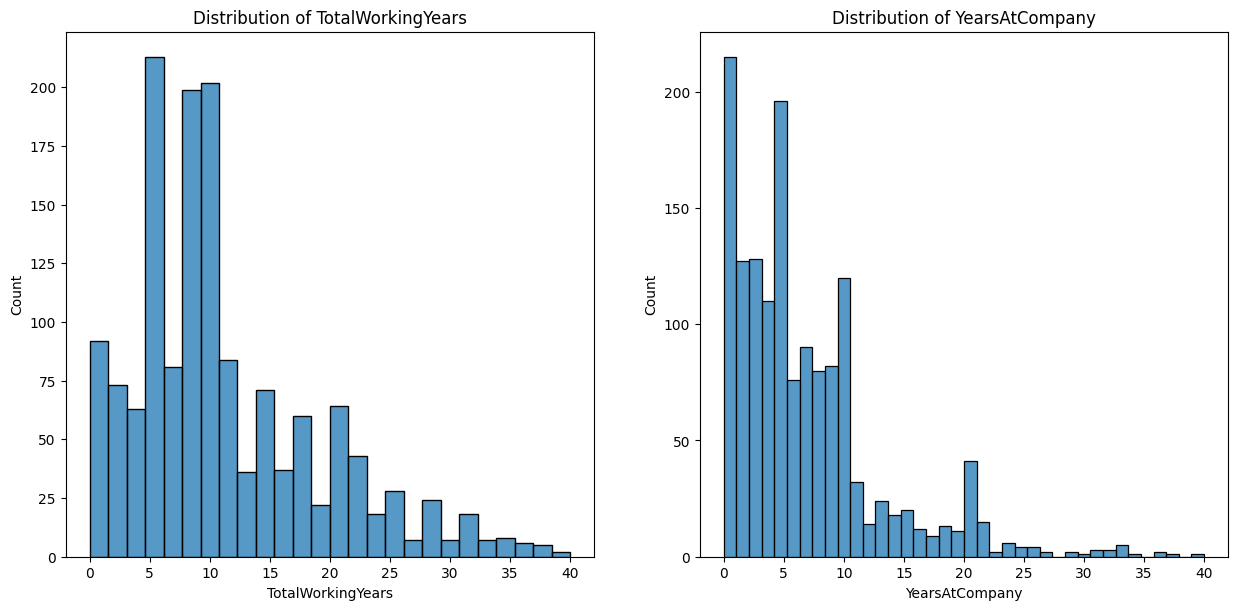

In [291]:
plt.figure(figsize=(15, 15))

# Plot histograms for numerical columns
numerical_cols = [ 'TotalWorkingYears', 'YearsAtCompany']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(Data[col])
    plt.title(f'Distribution of {col}')

plt.show()



> BusinessTravel Distribution



In [292]:
BusinessTravel = Data['BusinessTravel'].unique()
colors=['#37E2D5','#FF4949','#A85CF9','#FF5D55D']
explode = [0.1] + [0] * (len(BusinessTravel) - 1)

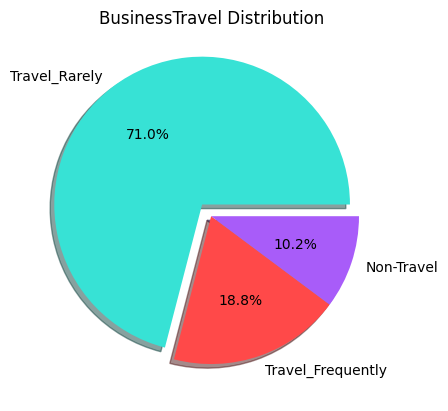

In [293]:
plt.pie(Data['BusinessTravel'].value_counts(),
        labels=BusinessTravel, shadow=True,
        explode=explode, colors=colors,
        autopct='%1.1f%%')
plt.title('BusinessTravel Distribution')
plt.show()



> PerformanceRating Distribution



In [294]:
performance_ratings = Data['PerformanceRating'].unique()
colors = plt.cm.Pastel1(range(len(performance_ratings)))
explode = [0.1] + [0] * (len(performance_ratings) - 1)

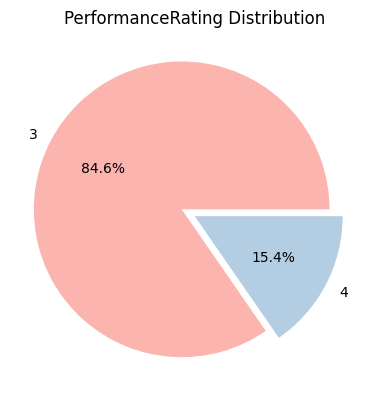

In [295]:
plt.pie(Data['PerformanceRating'].value_counts(),
        labels=performance_ratings,
        explode=explode, colors=colors,
        autopct='%1.1f%%')
plt.title('PerformanceRating Distribution')
plt.show()



> DistanceFromHome Distribution



Text(0.5, 1.0, 'DistanceFromHome Distribution')

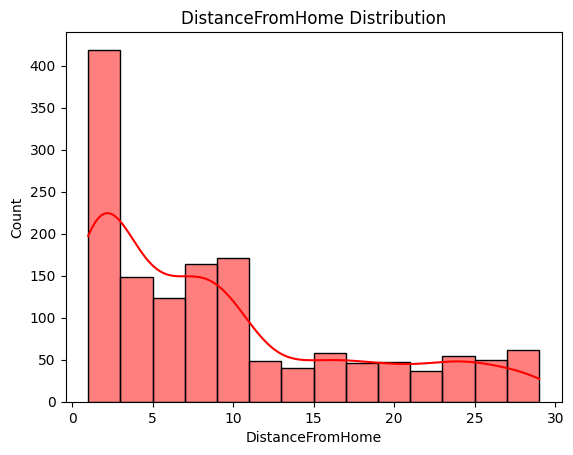

In [296]:
sns.histplot(data=Data, x="DistanceFromHome", kde=True, color='red')
plt.title('DistanceFromHome Distribution')



> Scatter Plot of MonthlyIncome vs. Job YearsAtCompany



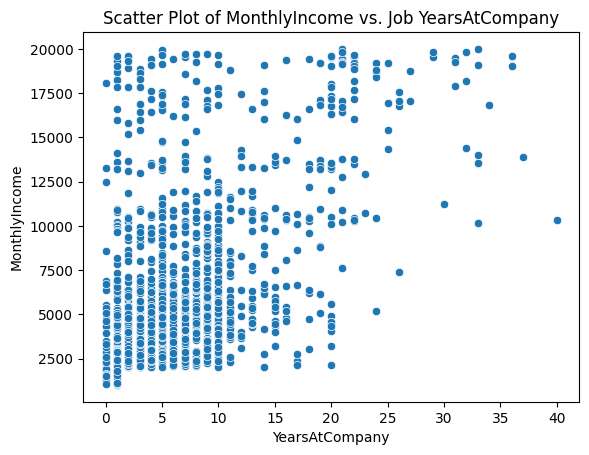

In [297]:
sns.scatterplot(
    data=Data,
    x='YearsAtCompany',
    y='MonthlyIncome',)
plt.title('Scatter Plot of MonthlyIncome vs. Job YearsAtCompany')
fig.show()

MonthlyIncome Doesn't have clear relation with YearsAtCompany



> Attrition by Age



Text(0.5, 1.0, 'Attrition by Age')

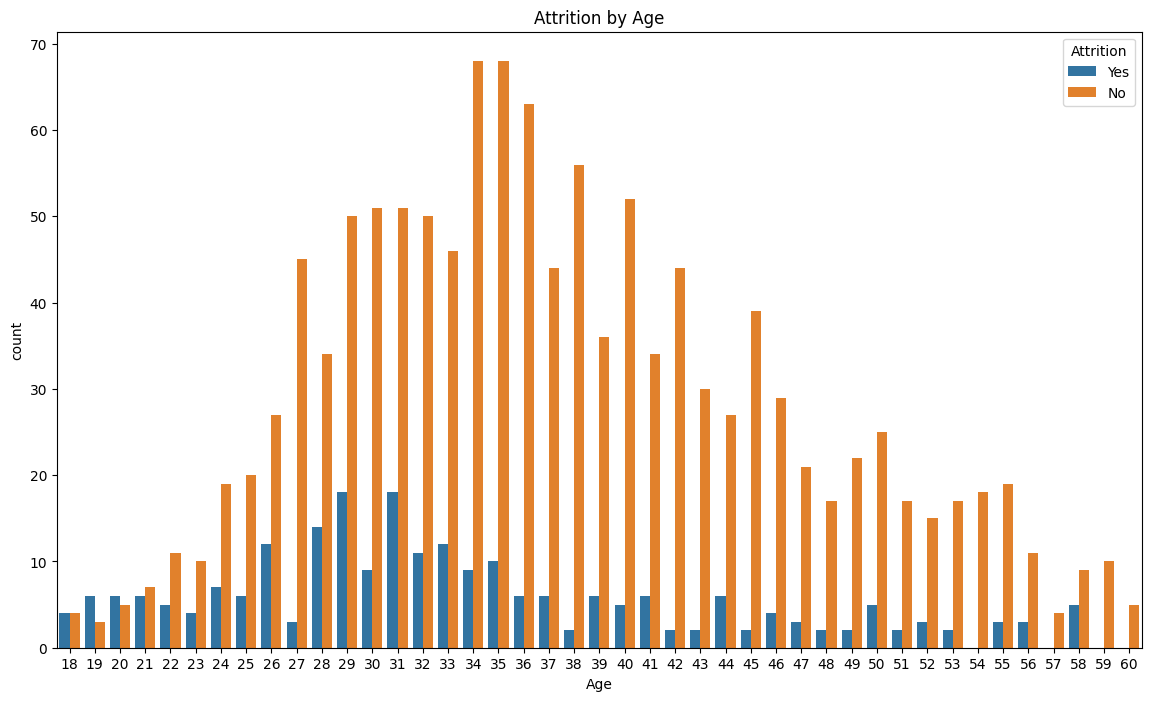

In [298]:
plt.figure(figsize=(14,8))
sns.countplot(data=Data, x="Age",hue='Attrition')
plt.title('Attrition by Age')



> Education by Age



Text(0.5, 1.0, 'Education by Age')

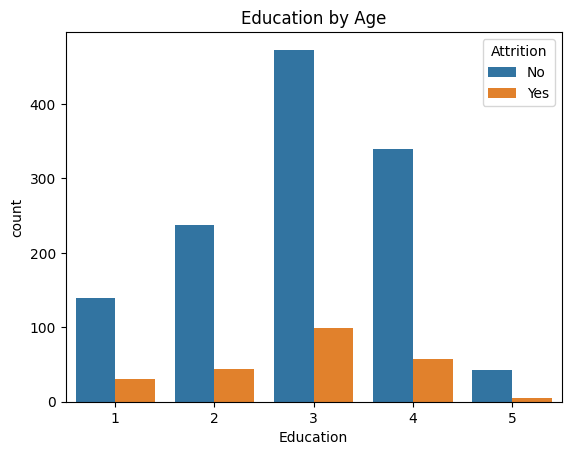

In [299]:
sns.countplot(data=Data, x="Education",hue='Attrition')
plt.title('Education by Age')



> **Boxplot**



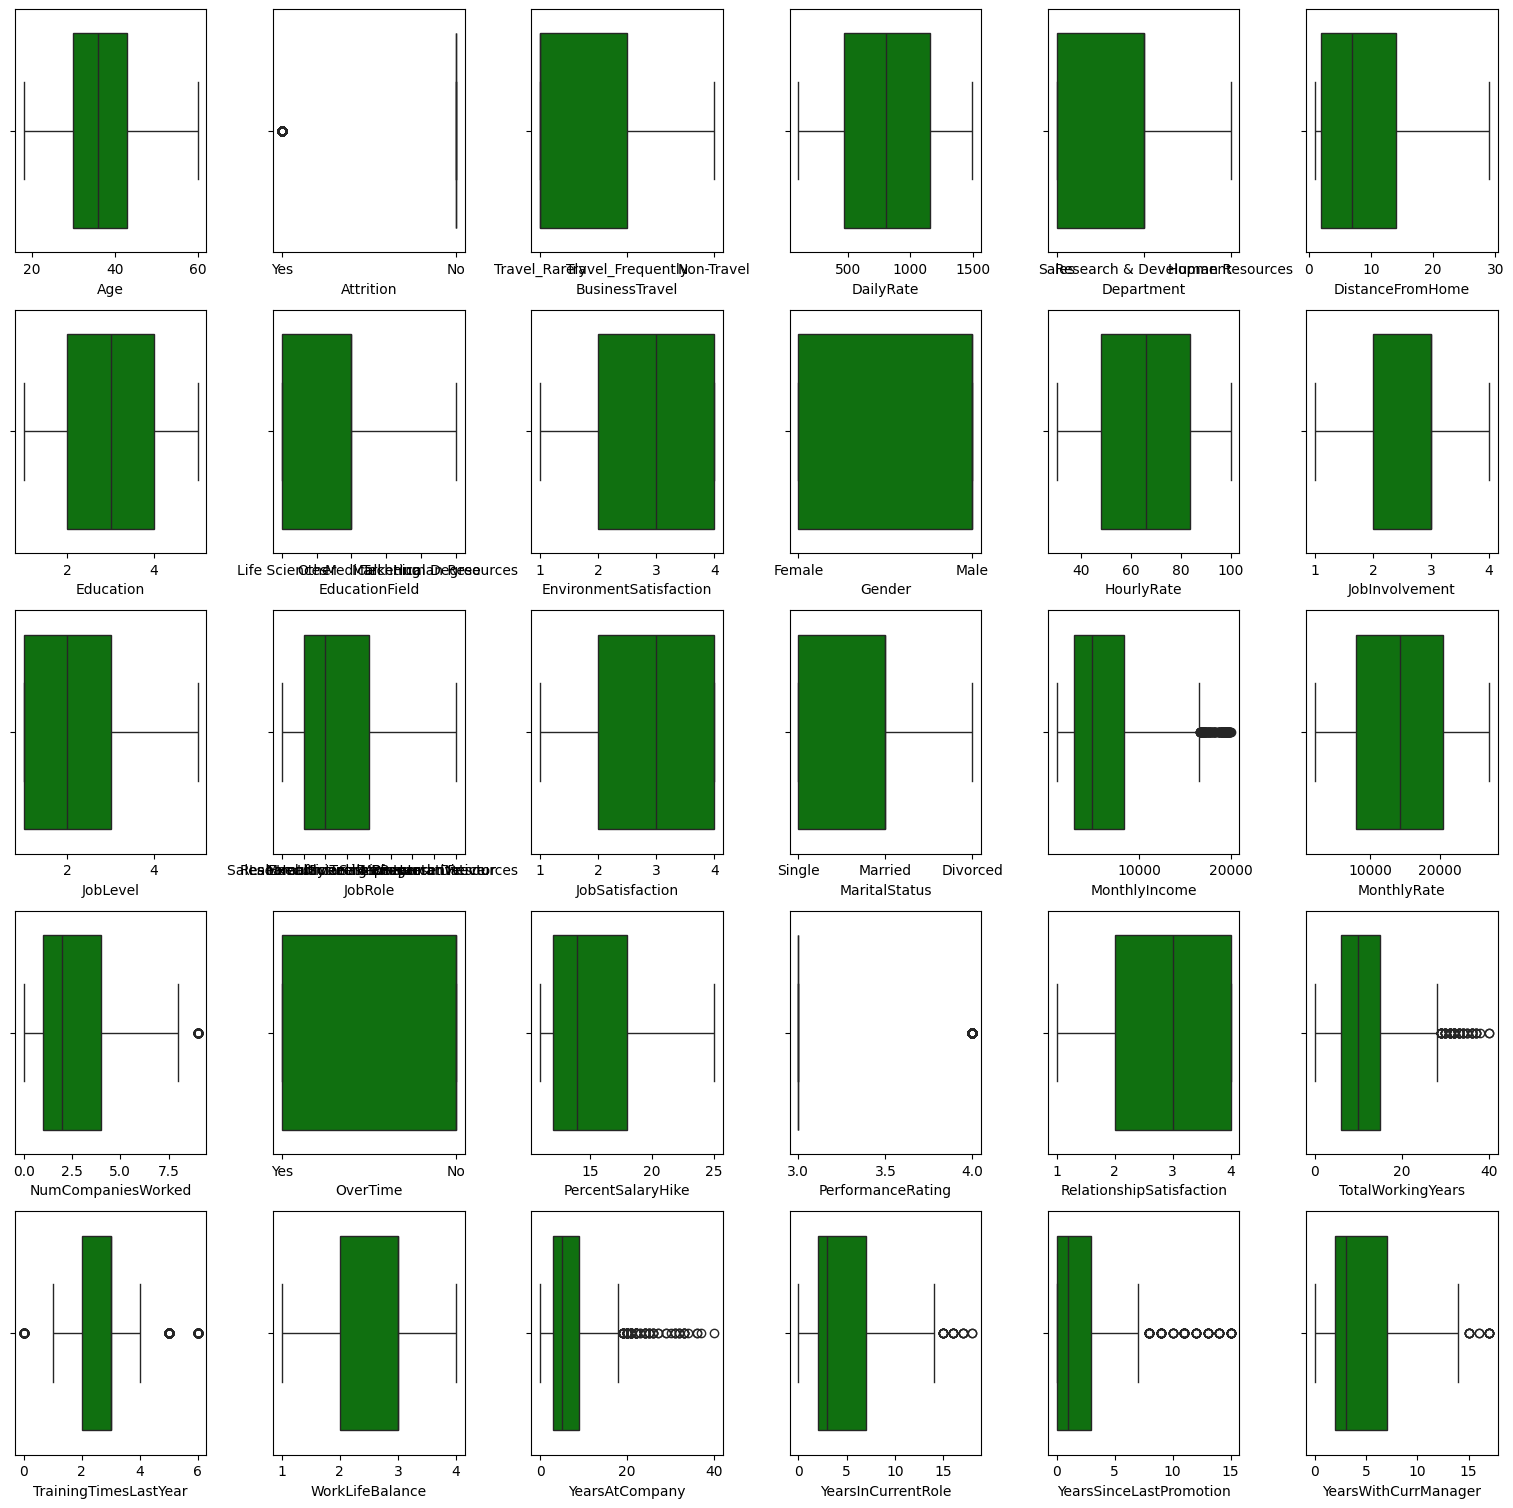

In [300]:
fig,axis=plt.subplots(5,6,figsize=(15,15))
index=0
axis=axis.flatten()
for col,val in Data.items():
    sns.boxplot(data=Data,x=col,color='green',ax=axis[index])
    index+=1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1)



> Distribution of Hourly Rate Across Departments



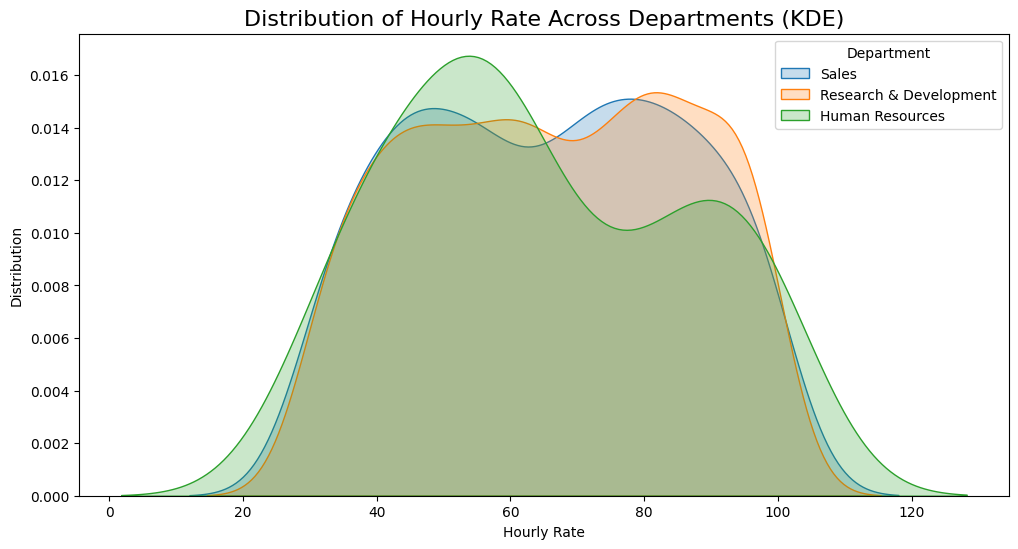

In [301]:
plt.figure(figsize=(12, 6))

# Create a KDE plot for each department
for department in Data['Department'].unique():
    sns.kdeplot(Data[Data['Department'] == department]['HourlyRate'],
                 label=department, fill=True )

# Add titles and labels
plt.title('Distribution of Hourly Rate Across Departments (KDE)', fontsize=16)
plt.xlabel('Hourly Rate')
plt.ylabel('Distribution')
plt.legend(title='Department')

# Show the plot



> Daily Rate vs job satisfaction



Text(0.5, 1.0, 'Daily Rate vs job satisfaction')

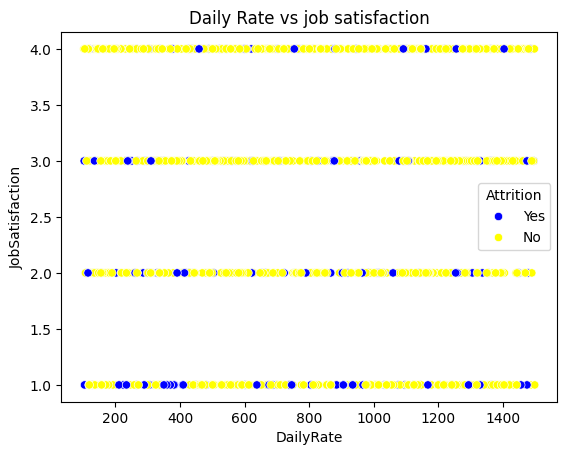

In [302]:
sns.scatterplot(data=Data, x="DailyRate", y="JobSatisfaction",hue='Attrition',palette={'Yes': 'blue', 'No': 'yellow'})
plt.title('Daily Rate vs job satisfaction')



> **Correlation of Features**


  Overview of how the features are related to one another







In [303]:
corr=Data.select_dtypes(include=['number']).corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.003634,0.001904,0.053535,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.022704,0.000473,0.007846,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.040235,0.027110,0.006557,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.011111,-0.024539,-0.009118,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.031701,-0.029548,0.007665,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.009062,-0.002172,0.001330,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.017205,-0.029071,0.034297,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.034730,-0.021222,0.021642,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.020002,0.002297,-0.012454,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.027269,-0.017120,0.025873,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


Text(0.5, 1.0, 'correlation of features')

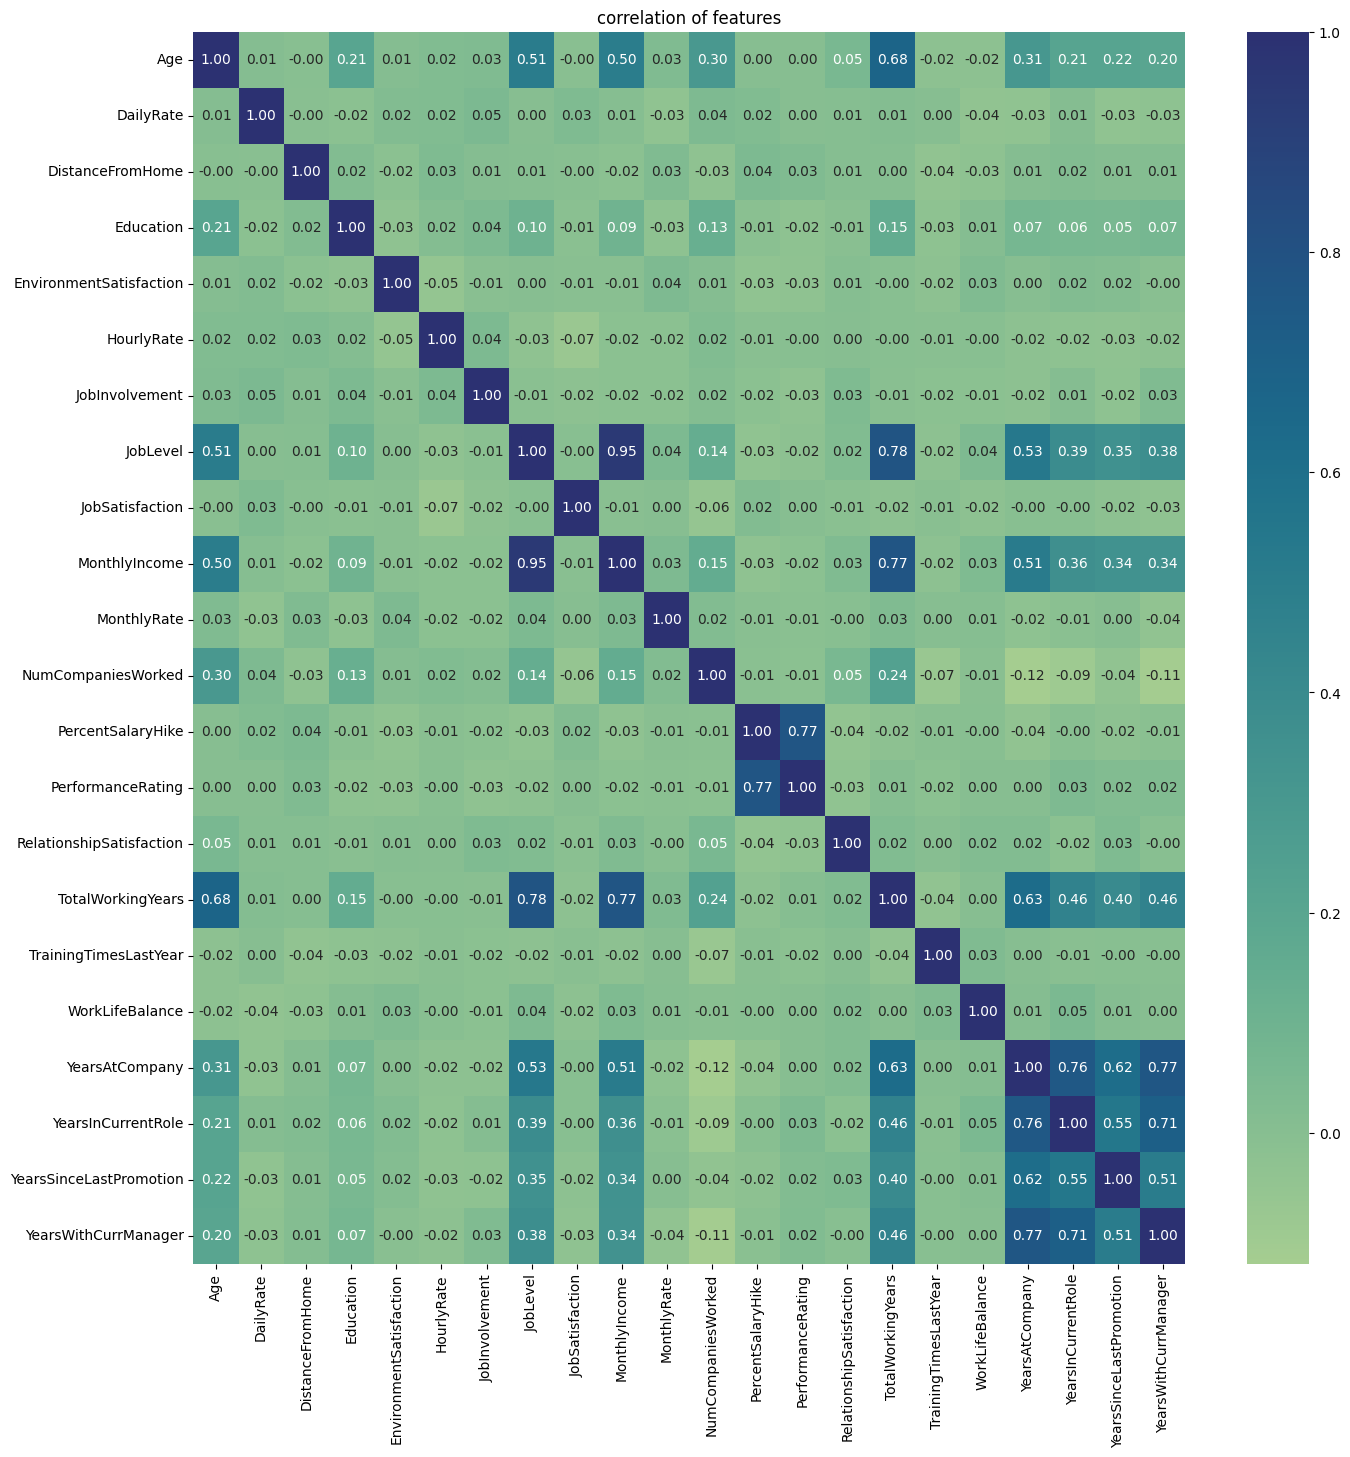

In [304]:
plt.figure(figsize=(16,16))
sns.heatmap(corr, annot=True,fmt='.2f', cmap='crest')
plt.title('correlation of features')



> **Outliers**



In [305]:
def plot_boxplt(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
Data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Define a function called outliers whis to return a list of index then define a function called remove to return clean data without outliers.

In [306]:
def outliers(df,ft):
    q1,q3=np.percentile(df[ft],[25,75])
    iqr=q3-q1
    lw=q1-(1.5*iqr)
    uw=q3+(1.5*iqr)
    ls=df.index[(df[ft]<lw) | (df[ft]>uw)]
    return ls

index_ls=[]

for i in ['MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']:
    index_ls.extend(outliers(Data,i))

def Remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(index=ls)
    return df
Data=Remove(Data,index_ls)

Test to check data without outliers.

<Axes: xlabel='NumCompaniesWorked'>

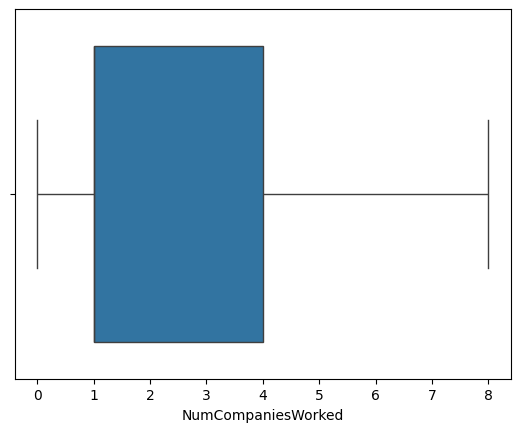

In [307]:
sns.boxplot(data=Data,x='NumCompaniesWorked')

# Feature Engineering



> **Transforming categorical data into numerical data**

you can use the get_dummies method from Pandas which creates encoded dummy variables from the categorical variables .So I will use LabelEncoder to transforming

In [308]:
from sklearn.preprocessing import LabelEncoder
Label_en=LabelEncoder()
for col in Data.select_dtypes(include=['object']).columns:
    Data[col]=Label_en.fit_transform(Data[col])
Data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,1,279,1,8,1,1,3,1,...,23,4,4,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,15,3,2,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,11,3,3,8,3,3,8,7,3,0
5,32,0,1,1005,1,2,2,1,4,1,...,13,3,3,8,2,2,7,7,3,6
6,59,0,2,1324,1,3,3,3,3,0,...,20,4,1,12,3,2,1,0,0,0




> **Splitting**



In [309]:
features=Data.drop('Attrition',axis=1)
labels=Data['Attrition']

In [310]:
#split data into 0.2 testing and 0.8 training
X_train, X_test, y_train, y_test = train_test_split(features,labels, stratify=labels, test_size = 0.2, random_state = 42)

In [311]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(X_train,y_train)
smote_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,35,2,802,1,10,3,4,2,1,45,...,20,4,1,3,4,2,3,2,1,2
1,26,1,575,1,3,1,5,3,1,73,...,22,4,3,7,2,3,6,4,0,4
2,42,2,1265,1,3,3,1,3,0,95,...,13,3,2,17,1,2,5,3,1,3
3,34,2,131,2,2,3,2,3,0,86,...,12,3,4,4,3,3,3,2,0,2
4,30,2,852,1,1,1,1,4,1,55,...,12,3,3,10,1,2,10,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,28,1,122,1,4,3,2,2,0,59,...,16,3,1,3,2,3,2,1,0,1
1296,33,2,581,1,7,3,1,1,0,63,...,12,3,3,4,3,3,2,2,1,2
1297,30,2,1033,1,4,1,2,2,1,83,...,11,3,2,6,2,3,4,2,0,2
1298,45,1,955,1,6,4,1,1,1,60,...,14,3,3,15,2,2,3,2,0,2




> **Scaling**



In [312]:
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

# Apply PCA after scaling
pca = PCA(n_components=0.85)
X_train_pca = pca.fit_transform(X_train_standard)
X_test_pca = pca.transform(X_test_standard)

# Use the transformed variables as your final datasets
X_train__standard = X_train_pca
X_test__standard  = X_test_pca

# Building ML Models

Define evalute_module for all ML Models

In [313]:
def evaluate_model(model,x_train,y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    class_report_for_train_data = classification_report(y_train, y_train_pred)
    Train_score = []
    Accuracy = []
    print(f'Train_score: {model.score(x_train,y_train)* 100:.2f}%\n')
    print(f'Accuracy: {accuracy * 100:.2f}%\n')
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print('Classification Report:')
    print(class_report)
    print("=================================================================================================")
    print('Classification Report:')
    print(class_report_for_train_data)



> **Logistic Regression**



Train_score: 87.18%

Accuracy: 85.79%



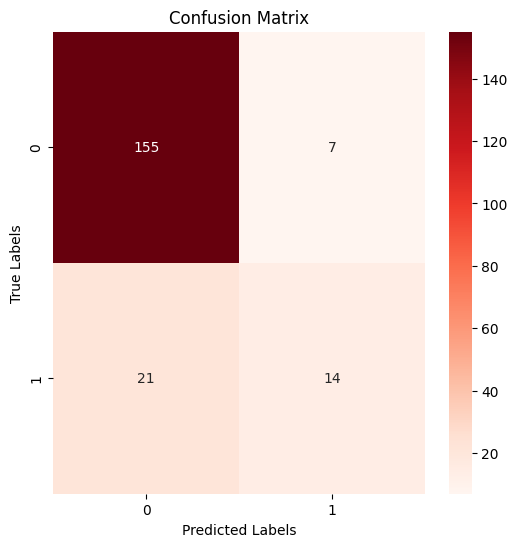

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       162
           1       0.67      0.40      0.50        35

    accuracy                           0.86       197
   macro avg       0.77      0.68      0.71       197
weighted avg       0.84      0.86      0.84       197

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       650
           1       0.73      0.42      0.53       138

    accuracy                           0.87       788
   macro avg       0.81      0.69      0.73       788
weighted avg       0.86      0.87      0.86       788



In [314]:
# Bulid Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_standard,y_train)
y_pred = lr.predict(X_test_standard )
y_train_pred = lr.predict(X_train_standard)
# Evaluate the model
evaluate_model(lr,X_train_standard,y_test,y_pred)



> **Decision Trees**



Train_score: 100.00%

Accuracy: 78.68%



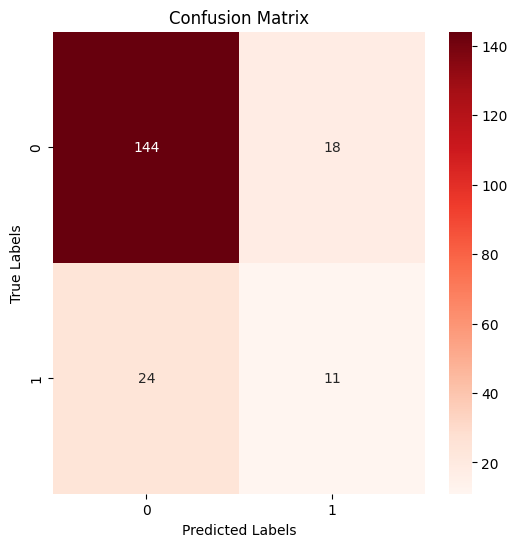

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       162
           1       0.38      0.31      0.34        35

    accuracy                           0.79       197
   macro avg       0.62      0.60      0.61       197
weighted avg       0.77      0.79      0.78       197

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       650
           1       1.00      1.00      1.00       138

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788



In [315]:
# Bulid ecisionTreeClassifier model
Ds=DecisionTreeClassifier()
Ds.fit(X_train_standard,y_train)
y_pred = Ds.predict(X_test_standard)
y_train_pred = Ds.predict(X_train_standard)
# Evaluate the model
evaluate_model(Ds,X_train_standard,y_test,y_pred)

Train_score: 90.23%

Accuracy: 77.66%



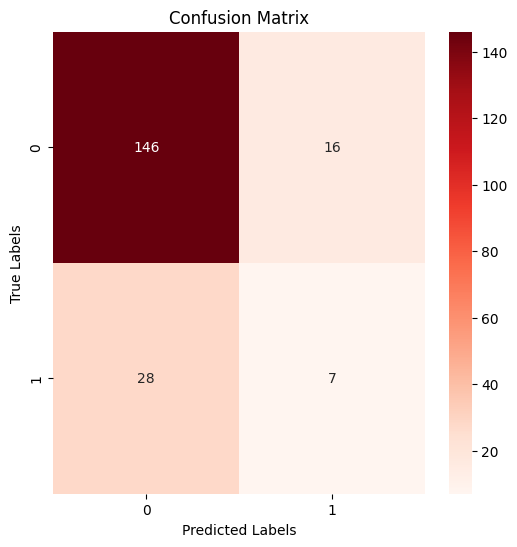

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       162
           1       0.30      0.20      0.24        35

    accuracy                           0.78       197
   macro avg       0.57      0.55      0.56       197
weighted avg       0.74      0.78      0.76       197

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       650
           1       0.79      0.61      0.69       138

    accuracy                           0.90       788
   macro avg       0.85      0.79      0.81       788
weighted avg       0.90      0.90      0.90       788



In [316]:
# Bulid DecisionTreeClassifier model
Ds=DecisionTreeClassifier(criterion='entropy', max_features='sqrt', min_samples_leaf=2, min_samples_split=7,
                               splitter='random',random_state=42)
Ds.fit(X_train_standard,y_train)
y_pred = Ds.predict(X_test_standard)
y_train_pred = Ds.predict(X_train_standard)
# Evaluate the model
evaluate_model(Ds,X_train_standard,y_test,y_pred)



> **Random Forest**



Train_score: 100.00%

Accuracy: 85.28%



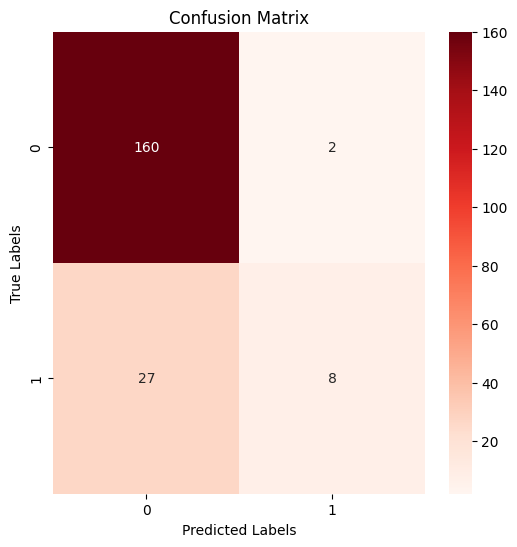

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       162
           1       0.80      0.23      0.36        35

    accuracy                           0.85       197
   macro avg       0.83      0.61      0.64       197
weighted avg       0.85      0.85      0.82       197

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       650
           1       1.00      1.00      1.00       138

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788



In [317]:
Rf = RandomForestClassifier(bootstrap=True, n_estimators=300, random_state=42, criterion='gini')
Rf.fit(X_train_standard,y_train)
y_pred = Rf.predict(X_test_standard)
y_train_pred = Rf.predict(X_train_standard)
# Evaluate the model
evaluate_model(Rf,X_train_standard,y_test,y_pred)

In [318]:
rf = RandomForestClassifier()
# get param
param_grid = {
    'n_estimators': [50, 100, 200,1000],
    'max_depth': [None, 10, 20, 30.100],
    'min_samples_split': [2, 5, 10,20]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_standard, y_train)
best_rf = grid_search_rf.best_estimator_
rf_pred = best_rf.predict(X_test_standard)
y_train_pred = best_rf.predict(X_train_standard)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8477157360406091
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       162
           1       0.78      0.20      0.32        35

    accuracy                           0.85       197
   macro avg       0.81      0.59      0.62       197
weighted avg       0.84      0.85      0.81       197





> **Support Vector Machines (SVM)**



Train_score: 91.75%

Accuracy: 85.28%



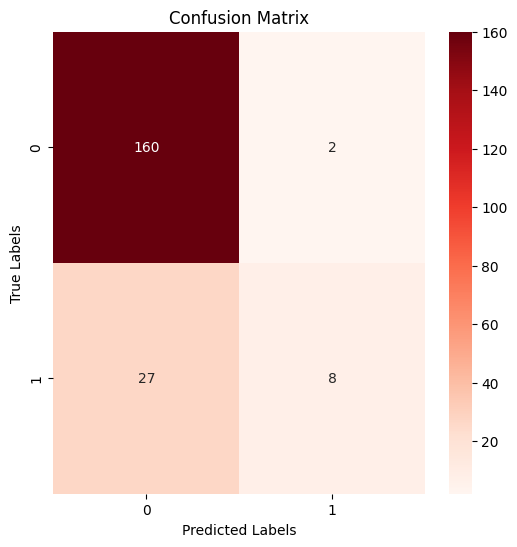

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       162
           1       0.80      0.23      0.36        35

    accuracy                           0.85       197
   macro avg       0.83      0.61      0.64       197
weighted avg       0.85      0.85      0.82       197

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       650
           1       1.00      0.53      0.69       138

    accuracy                           0.92       788
   macro avg       0.95      0.76      0.82       788
weighted avg       0.93      0.92      0.91       788



In [319]:
SVM=SVC()
SVM.fit(X_train_standard,y_train)
y_pred = SVM.predict(X_test_standard)
y_train_pred =SVM.predict(X_train_standard)
# Evaluate the model
evaluate_model(SVM,X_train_standard,y_test,y_pred)



> **Naive Bayes**



Train_score: 80.33%

Accuracy: 82.23%



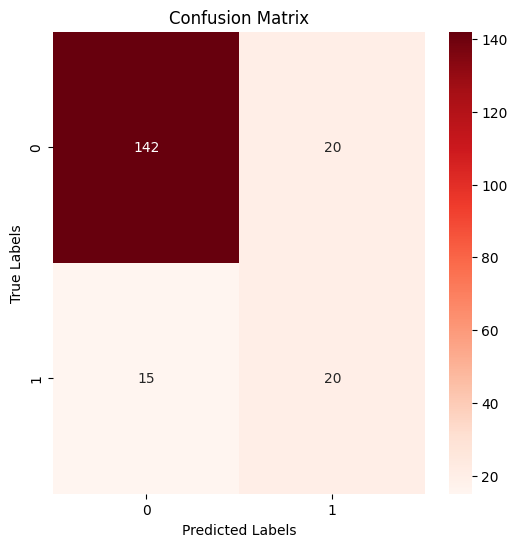

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       162
           1       0.50      0.57      0.53        35

    accuracy                           0.82       197
   macro avg       0.70      0.72      0.71       197
weighted avg       0.83      0.82      0.83       197

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       650
           1       0.45      0.59      0.51       138

    accuracy                           0.80       788
   macro avg       0.68      0.72      0.70       788
weighted avg       0.83      0.80      0.81       788



In [320]:
Nb=GaussianNB()
Nb.fit(X_train_standard,y_train)
y_pred = Nb.predict(X_test_standard)
y_train_pred = Nb.predict(X_train_standard)
# Evaluate the model
evaluate_model(Nb,X_train_standard,y_test,y_pred)





>  **Gradient Boosting**





In [321]:
gb = GradientBoostingClassifier()
# get_params
params = gb.get_params()
params

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Train_score: 100.00%

Accuracy: 83.76%



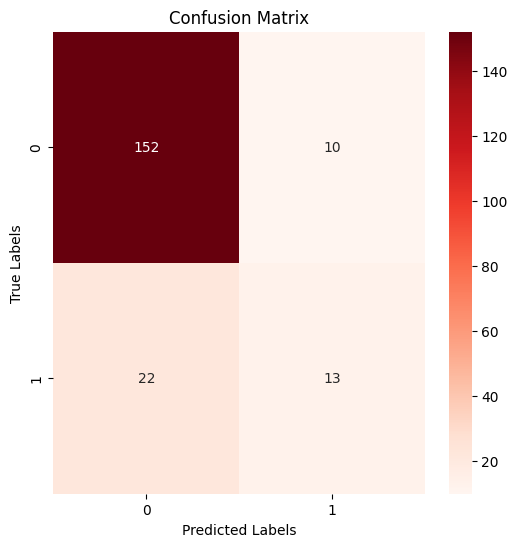

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       162
           1       0.57      0.37      0.45        35

    accuracy                           0.84       197
   macro avg       0.72      0.65      0.68       197
weighted avg       0.82      0.84      0.82       197

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       650
           1       1.00      1.00      1.00       138

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788



In [322]:
GB = GradientBoostingClassifier(n_estimators=400, learning_rate=0.4, loss='log_loss', random_state=42)
GB.fit(X_train_standard,y_train)
y_pred = GB.predict(X_test_standard)
y_train_pred = GB.predict(X_train_standard)
# Evaluate the model
evaluate_model(GB,X_train_standard,y_test,y_pred)



> **XGBoost**



Train_score: 100.00%

Accuracy: 84.77%



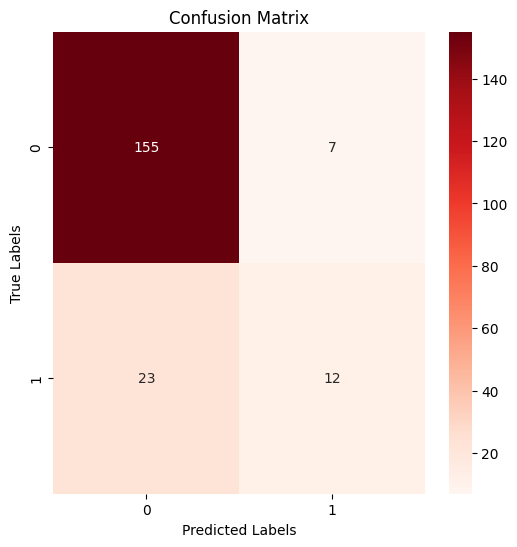

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       162
           1       0.63      0.34      0.44        35

    accuracy                           0.85       197
   macro avg       0.75      0.65      0.68       197
weighted avg       0.83      0.85      0.83       197

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       650
           1       1.00      1.00      1.00       138

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788



In [323]:
XGB = xgb.XGBClassifier()
XGB.fit(X_train_standard,y_train)
y_pred = XGB.predict(X_test_standard)
y_train_pred =XGB.predict(X_train_standard)
# Evaluate the model
evaluate_model(XGB,X_train_standard,y_test,y_pred)



> **K-Nearest Neighbors**



Train_score: 83.50%

Accuracy: 82.23%



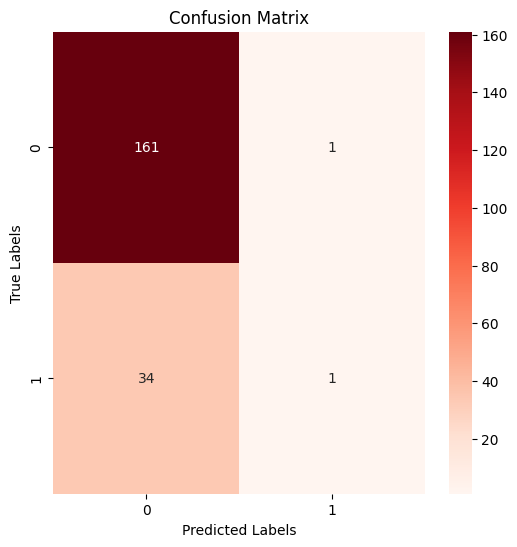

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       162
           1       0.50      0.03      0.05        35

    accuracy                           0.82       197
   macro avg       0.66      0.51      0.48       197
weighted avg       0.77      0.82      0.75       197

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       650
           1       1.00      0.06      0.11       138

    accuracy                           0.84       788
   macro avg       0.92      0.53      0.51       788
weighted avg       0.86      0.84      0.77       788



In [324]:
Knn_1 = KNeighborsClassifier(n_neighbors=15)
Knn_1.fit(X_train_standard,y_train)
y_pred = knn_1.predict(X_test_standard)
y_train_pred = Knn_1.predict(X_train_standard)
# Evaluate the model
evaluate_model(Knn_1,X_train_standard,y_test,y_pred)



> **AdaBoostClassifier**



Train_score: 82.49%

Accuracy: 82.23%



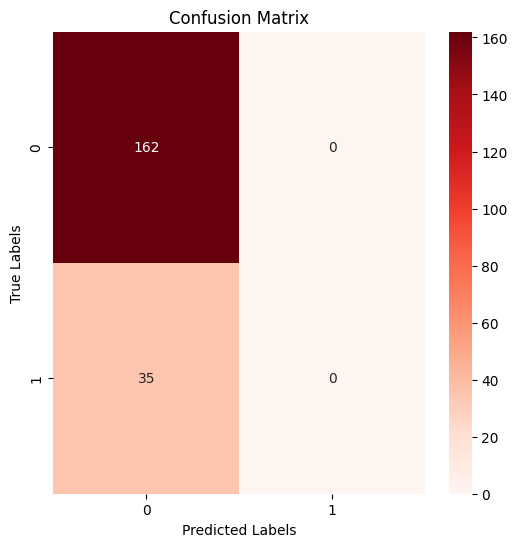

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       162
           1       0.00      0.00      0.00        35

    accuracy                           0.82       197
   macro avg       0.41      0.50      0.45       197
weighted avg       0.68      0.82      0.74       197

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       650
           1       0.00      0.00      0.00       138

    accuracy                           0.82       788
   macro avg       0.41      0.50      0.45       788
weighted avg       0.68      0.82      0.75       788



In [325]:
Add = AdaBoostClassifier(n_estimators=150, learning_rate=0.01, algorithm='SAMME', random_state=42)
Add.fit(X_train_standard,y_train)
y_pred = Add.predict(X_test_standard)
y_train_pred = Add.predict(X_train_standard)
# Evaluate the model
evaluate_model(Add,X_train_standard,y_test,y_pred)



> **Neural Network model**



In [326]:
mlp = MLPClassifier(max_iter=100)
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['relu'],
    'solver': [ 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train_standard, y_train)
best_mlp = grid_search_mlp.best_estimator_
mlp_pred = best_mlp.predict(X_test_standard)
print("Neural Network Accuracy:", accuracy_score(y_test, mlp_pred))
print("Neural Network Classification Report:\n", classification_report(y_test, mlp_pred))

Neural Network Accuracy: 0.8274111675126904
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       162
           1       0.52      0.40      0.45        35

    accuracy                           0.83       197
   macro avg       0.70      0.66      0.67       197
weighted avg       0.81      0.83      0.82       197



# Cross-Validation

In [336]:
# Cross-validation scores for the best models
cv_log_reg = cross_val_score(lr, features, labels, cv=5, scoring='accuracy')
cv_rf = cross_val_score(best_rf, features, labels, cv=5, scoring='accuracy')
cv_mlp = cross_val_score(best_mlp, features, labels, cv=5, scoring='accuracy')
cv_Nb = cross_val_score(Nb, features, labels, cv=5, scoring='accuracy')

results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Neural Network', 'Naive Bayes'],
    'CV Accuracy': [cv_log_reg.mean(), cv_rf.mean(), cv_mlp.mean(), cv_Nb.mean()]
}
results_df = pd.DataFrame(results)
results_df

,Model,CV Accuracy
0,Logistic Regression,0.829442
1,Random Forest,0.843655
2,Neural Network,0.800000
3,Naive Bayes,0.776650
